(mccall)=
```{raw} html
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Job Search I: The McCall Search Model

```{contents} Contents
:depth: 2
```

```{epigraph}
"Questioning a McCall worker is like having a conversation with an out-of-work friend:
'Maybe you are setting your sights too high', or 'Why did you quit your old job before you
had a new one lined up?' This is real social science: an attempt to model, to understand,
human behavior by visualizing the situation people find themselves in, the options they face
and the pros and cons as they themselves see them." -- Robert E. Lucas, Jr.
```

## Overview

The McCall search model {cite}`McCall1970` helped transform economists' way of thinking about labor markets.

To clarify vague notions such as "involuntary" unemployment, McCall modeled the decision problem of unemployed agents directly, in terms of factors such as

* current and likely future wages
* impatience
* unemployment compensation

To solve the decision problem he used dynamic programming.

Here we set up McCall's model and adopt the same solution method.

As we'll see, McCall's model is not only interesting in its own right but also an excellent vehicle for learning dynamic programming.

## The McCall Model

```{index} single: Models; McCall
```

An unemployed worker receives in each period a job offer at wage $W_t$.

At time $t$, our worker has two choices:

1. Accept the offer and work permanently at constant wage $W_t$.
1. Reject the offer, receive unemployment compensation $c$, and reconsider next period.

The wage sequence $\{W_t\}$ is assumed to be iid with probability mass function $p_1, \ldots, p_n$.

Here $p_i$ is the probability of observing wage offer $W_t = w_i$ in the set $w_1, \ldots, w_n$.

The worker is infinitely lived and aims to maximize the expected discounted sum of earnings.

$$
\mathbb{E} \sum_{t=0}^{\infty} \beta^t Y_t
$$

The constant $\beta$ lies in $(0, 1)$ and is called a **discount factor**.

The smaller is $\beta$, the more the worker discounts future utility relative to current utility.

The variable  $Y_t$ is income, equal to

* his wage $W_t$ when employed
* unemployment compensation $c$ when unemployed

### A Trade Off

The worker faces a trade-off:

* Waiting too long for a good offer is costly, since the future is discounted.
* Accepting too early is costly, since better offers might arrive in the future.

To decide optimally in the face of this trade off, we use dynamic programming.

Dynamic programming can be thought of as a two step procedure that

1. first assigns values to "states" and
1. then deduces optimal actions given those values

We'll go through these steps in turn.

### The Value Function

In order to optimally trade off current and future rewards, we need to think about two things:

1. the current payoffs we get from different choices
1. the different states that those choices will lead to next period (in this case, either employment or unemployment)

To weigh these two aspects of the decision problem, we need to assign *values* to states.

To this end, let $V(w)$ be the total lifetime *value* accruing to an unemployed worker who enters the current period unemployed but with wage offer $w$ in hand.

More precisely, $V(w)$ denotes the value of the objective function {eq}`objective` when an agent in this situation makes *optimal* decisions now and at all future points in time.

Of course $V(w)$ is not trivial to calculate because we don't yet know what decisions are optimal and what aren't!

But think of $V$ as a function that assigns to each possible wage $w$ the maximal lifetime value that can be obtained with that offer in hand.

A crucial observation is that this function $V$ must satisfy the recursion

```{math}
:label: odu_pv

V(w)
= \max \left\{
        \frac{w}{1 - \beta}, \, c + \beta \sum_{i=1}^n V(w_i) p_i
    \right\}
```

for every possible $w_i$  in $w_1, \ldots, w_n$.

This important equation is a version of the **Bellman equation**, which is
ubiquitous in economic dynamics and other fields involving planning over time.

The intuition behind it is as follows:

* the first term inside the max operation is the lifetime payoff from accepting current offer $w$, since

$$
w + \beta w + \beta^2 w + \cdots = \frac{w}{1 - \beta}
$$

* the second term inside the max operation is the **continuation value**, which is the lifetime payoff from rejecting the current offer and then behaving optimally in all subsequent periods

If we optimize and pick the best of these two options, we obtain maximal lifetime value from today, given current offer $w$.

But this is precisely $V(w)$, which is the l.h.s. of {eq}`odu_pv`.

### The Optimal Policy

Suppose for now that we are able to solve {eq}`odu_pv` for the unknown
function $V$.

Once we have this function in hand we can behave optimally (i.e., make the
right choice between accept and reject).

All we have to do is select the maximal choice on the r.h.s. of {eq}`odu_pv`.

The optimal action is best thought of as a **policy**, which is, in general, a map from
states to actions.

In our case, the state is the current wage offer $w$.

Given *any* $w$, we can read off the corresponding best choice (accept or
reject) by picking the max on the r.h.s. of {eq}`odu_pv`.

Thus, we have a map from $\mathbb{R}$ to $\{0, 1\}$, with 1 meaning accept and zero meaning reject.

We can write the policy as follows

$$
\sigma(w) := \mathbf{1}
    \left\{
        \frac{w}{1 - \beta} \geq c + \beta \sum_{i=1}^n V(w_i) p_i
    \right\}
$$

Here $\mathbf{1}\{ P \} = 1$ if statement $P$ is true and equals zero otherwise.

We can also write this as

$$
\sigma(w) := \mathbf{1} \{ w \geq \bar w \}
$$

where

```{math}
:label: odu_barw

\bar w := (1 - \beta) \left\{ c + \beta \sum_{i=1}^n V(w_i) p_i \right\}
```

Here $\bar w$ is a constant depending on $\beta, c$ and the wage distribution, called the *reservation wage*.

The agent should accept if and only if the current wage offer exceeds the reservation wage.

Clearly, we can compute this reservation wage if we can compute the value function.

## Computing the Optimal Policy: Take 1

To put the above ideas into action, we need to compute the value function at
points $w_1, \ldots, w_n$.

In doing so, we can identify these values with the vector $v = (v_i)$ where $v_i := V(w_i)$.

In view of {eq}`odu_pv`, this vector satisfies the nonlinear system of equations

```{math}
:label: odu_pv2

v_i
= \max \left\{
        \frac{w_i}{1 - \beta}, \, c + \beta \sum_{i=1}^n v_i p_i
    \right\}
\quad
\text{for } i = 1, \ldots, n
```

It turns out that there is exactly one vector $v := (v_i)_{i=1}^n$ in
$\mathbb R^n$ that satisfies this equation.

### The Algorithm

To compute this vector, we proceed as follows:

Step 1: pick an arbitrary initial guess $v \in \mathbb R^n$.

Step 2: compute a new vector $v' \in \mathbb R^n$ via

```{math}
:label: odu_pv2p

v'_i
= \max \left\{
        \frac{w_i}{1 - \beta}, \, c + \beta \sum_{i=1}^n v_i p_i
    \right\}
\quad
\text{for } i = 1, \ldots, n
```

Step 3: calculate a measure of the deviation between $v$ and $v'$, such as $\max_i |v_i - v_i'|$.

Step 4: if the deviation is larger than some fixed tolerance, set $v = v'$ and go to step 2, else continue.

Step 5: return $v$.

This algorithm returns an arbitrarily good approximation to the true solution
to {eq}`odu_pv2`, which represents the value function.

(Arbitrarily good means here that the approximation converges to the true
solution as the tolerance goes to zero)

### The Fixed Point Theory

What's the math behind these ideas?

First, one defines a mapping $T$ from $\mathbb R^n$ to
itself via

```{math}
:label: odu_pv3

Tv_i
= \max \left\{
        \frac{w_i}{1 - \beta}, \, c + \beta \sum_{i=1}^n v_i p_i
    \right\}
\quad
\text{for } i = 1, \ldots, n
```

(A new vector $Tv$ is obtained from given vector $v$ by evaluating
the r.h.s. at each $i$)

One can show that the conditions of the Banach contraction mapping theorem are
satisfied by $T$ as a self-mapping on $\mathbb{R}^n$.

One implication is that $T$ has a unique fixed point in $\mathbb R^n$.

Moreover, it's immediate from the definition of $T$ that this fixed
point is precisely the value function.

The iterative algorithm presented above corresponds to iterating with
$T$ from some initial guess $v$.

The Banach contraction mapping theorem tells us that this iterative process
generates a sequence that converges to the fixed point.

### Implementation

In [1]:
using LinearAlgebra, Statistics
using Distributions, Expectations, LaTeXStrings
using NLsolve, Roots, Random, Plots, Parameters

In [2]:
using Test

Here's the distribution of wage offers we'll work with

support(dist) = 0:50


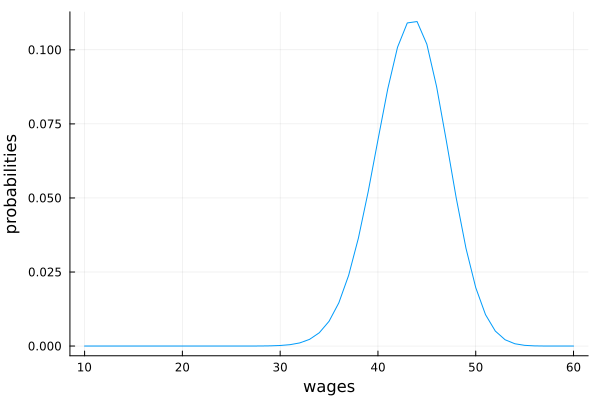

In [3]:
n = 50
dist = BetaBinomial(n, 200, 100) # probability distribution
@show support(dist)
w = range(10.0, 60.0, length = n+1) # linearly space wages

using StatsPlots
plt = plot(w, pdf.(dist, support(dist)), xlabel = "wages",
           ylabel = "probabilities", legend = false)

We can explore taking expectations over this distribution

In [4]:
E = expectation(dist) # expectation operator

# exploring the properties of the operator
wage(i) = w[i+1] # +1 to map from support of 0
E_w = E(wage)
E_w_2 = E(i -> wage(i)^2) - E_w^2 # variance
@show E_w, E_w_2

# use operator with left-multiply
@show E * w # the `w` are values assigned for the discrete states
@show dot(pdf.(dist, support(dist)), w); # identical calculation

(E_w, E_w_2) = (43.333333333332845, 12.919896640843035)
E * w = 43.333333333332845
dot(pdf.(dist, support(dist)), w) = 43.333333333332845


To implement our algorithm, let's have a look at the sequence of approximate value functions that
this fixed point algorithm generates.

Default parameter values are embedded in the function.

Our initial guess $v$ is the value of accepting at every given wage

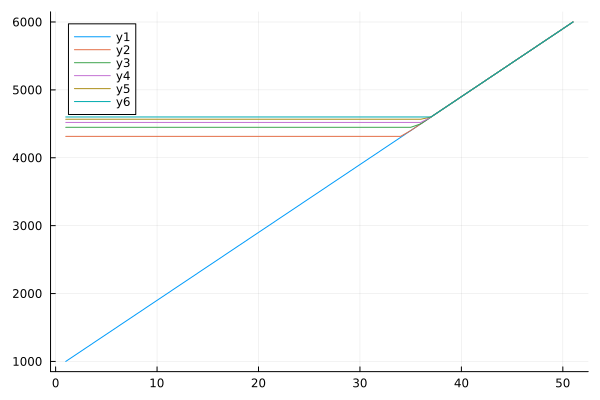

In [5]:
# parameters and constant objects

c = 25
β = 0.99
num_plots = 6

# Operator
T(v) = max.(w/(1 - β), c + β * E*v) # (5) broadcasts over the w, fixes the v
# alternatively, T(v) = [max(wval/(1 - β), c + β * E*v) for wval in w]

# fill in  matrix of vs
vs = zeros(n + 1, 6) # data to fill
vs[:, 1] .= w / (1-β) # initial guess of "accept all"

# manually applying operator
for col in 2:num_plots
    v_last = vs[:, col - 1]
    vs[:, col] .= T(v_last)  # apply operator
end
plot(vs)

One approach to solving the model is to directly implement this sort of iteration, and continues until measured deviation
between successive iterates is below tol

In [6]:
function compute_reservation_wage_direct(params; v_iv = collect(w ./(1-β)),
                                         max_iter = 500, tol = 1e-6)
    (;c, β, w) = params

    # create a closure for the T operator
    T(v) = max.(w/(1 - β), c + β * E*v) # (5) fixing the parameter values

    v = copy(v_iv) # copy to prevent v_iv modification
    v_next = similar(v)
    i = 0
    error = Inf
    while i < max_iter && error > tol
        v_next .= T(v) # (4)
        error = norm(v_next - v)
        i += 1
        v .= v_next  # copy contents into v
    end
    # now compute the reservation wage
    return (1 - β) * (c + β * E*v) # (2)
end

compute_reservation_wage_direct (generic function with 1 method)

In the above, we use `v = copy(v_iv)` rather than just `v_iv = v`.

To understand why, first recall that `v_iv` is a function argument -- either defaulting to the given value, or passed into the function

* If we had gone `v = v_iv` instead, then it would have simply created a new name `v` which binds to whatever is located at `v_iv`.
* Since we later use `v .= v_next` later in the algorithm, the values in it would be modified.
* Hence, we would be modifying the `v_iv` vector we were passed in, which may not be what the caller of the function wanted.
* The big issue this creates are "side-effects" where you can call a function and strange things can happen outside of the function that you didn't expect.
* If you intended for the modification to potentially occur, then the Julia style guide says that we should call the function `compute_reservation_wage_direct!` to make the possible side-effects clear.

> 

As usual, we are better off using a package, which may give a better algorithm and is likely to less error prone.

In this case, we can use the `fixedpoint` algorithm discussed in {doc}`our Julia by Example lecture <../getting_started_julia/julia_by_example>`  to find the fixed point of the $T$ operator.  Note that below we set the parameter `m=1` for Anderson iteration rather than leaving as the default value - which fails to converge in this case.  This is still almost 10x faster than the `m=0` case, which corresponds to naive fixed-point iteration.

In [7]:
function compute_reservation_wage(params; v_iv = collect(w ./(1-β)),
                                  iterations = 500, ftol = 1e-6, m = 1)
    (;c, β, w) = params
    T(v) = max.(w/(1 - β), c + β * E*v) # (5) fixing the parameter values

    sol = fixedpoint(T, v_iv; iterations, ftol, m) # (5)
    sol.f_converged || error("Failed to converge")
    v_star = sol.zero
    return (1 - β) * (c + β * E*v_star) # (3)
end

compute_reservation_wage (generic function with 1 method)

Note that this checks the convergence (i.e, the `sol.f_converged`) from the fixedpoint iteration and throws an error if it fails.

This coding pattern, where `expression || error("failure)` first checks the expression is true and then moves to the right hand side of the `||` or operator if it is false, is a common pattern in Julia.

Let's compute the reservation wage at the default parameters

In [8]:
mcm = @with_kw (c=25.0, β=0.99, w=w) # named tuples

compute_reservation_wage(mcm()) # call with default parameters

47.31649976652307

In [9]:
@testset "Reservation Wage Tests" begin
    @test compute_reservation_wage(mcm()) ≈ 47.316499766546215
    @test compute_reservation_wage_direct(mcm()) ≈ 47.31649975736077
end

Test Summary:          | Pass  Total  Time
Reservation Wage Tests |    2      2  0.5s


Test.DefaultTestSet("Reservation Wage Tests", Any[], 2, false, false, true, 1.690419187081009e9, 1.690419187536755e9, false)

### Comparative Statics

Now we know how to compute the reservation wage, let's see how it varies with
parameters.

In particular, let's look at what happens when we change $\beta$ and
$c$.

In [10]:
grid_size = 25
R = zeros(grid_size, grid_size)

c_vals = range(10.0, 30.0, length = grid_size)
β_vals = range(0.9, 0.99, length = grid_size)

for (i, c) in enumerate(c_vals)
    for (j, β) in enumerate(β_vals)
        R[i, j] = compute_reservation_wage(mcm(;c, β);m=0)
    end
end

Note the above is setting the `m` parameter to `0` to use naive fixed-point iteration.  This is because the Anderson iteration fails to converge in a 2 of the 25^2 cases.

This demonstrates care must be used with advanced algorithms, and checking the return type (i.e., the `sol.f_converged` field) is important.

In [11]:
@testset "Comparative Statics Tests" begin
    @test minimum(R) ≈ 40.39579058732559
    @test maximum(R) ≈ 47.69960582438523
    @test R[4, 4] ≈ 41.15851842606614 # arbitrary reservation wage.
    @test grid_size == 25 # grid invariance.
    @test length(c_vals) == grid_size && c_vals[1] ≈ 10.0 && c_vals[end] ≈ 30.0
    @test length(β_vals) == grid_size && β_vals[1] ≈ 0.9 && β_vals[end] ≈ 0.99
end

Test Summary:             | Pass  Total  Time
Comparative Statics Tests |    6      6  0.1s


Test.DefaultTestSet("Comparative Statics Tests", Any[], 6, false, false, true, 1.690419188893959e9, 1.690419188993699e9, false)

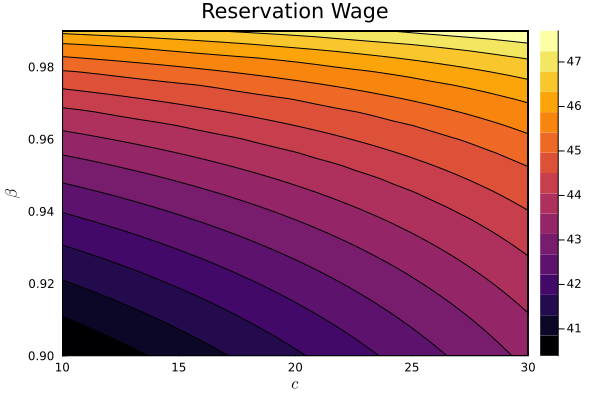

In [12]:
contour(c_vals, β_vals, R',
        title = "Reservation Wage",
        xlabel = L"c",
        ylabel = L"\beta",
        fill = true)

As expected, the reservation wage increases both with patience and with
unemployment compensation.

## Computing the Optimal Policy: Take 2

The approach to dynamic programming just described is very standard and
broadly applicable.

For this particular problem, there's also an easier way, which circumvents the
need to compute the value function.

Let $\psi$ denote the value of not accepting a job in this period but
then behaving optimally in all subsequent periods.

That is,

```{math}
:label: j1

\psi
= c + \beta
    \sum_{i=1}^n V(w_i) p_i
```

where $V$ is the value function.

By the Bellman equation, we then have

$$
V(w_i)
= \max \left\{ \frac{w_i}{1 - \beta}, \, \psi \right\}
$$

Substituting this last equation into {eq}`j1` gives

```{math}
:label: j2

\psi
= c + \beta
    \sum_{i=1}^n
    \max \left\{
        \frac{w_i}{1 - \beta}, \psi
    \right\}  p_i
```

Which we could also write as $\psi = T_{\psi}(\psi)$ for the appropriate operator.

This is a nonlinear equation that we can solve for $\psi$.

One solution method for this kind of nonlinear equation is iterative.

That is,

Step 1: pick an initial guess $\psi$.

Step 2: compute the update $\psi'$ via

```{math}
:label: j3

\psi'
= c + \beta
    \sum_{i=1}^n
    \max \left\{
        \frac{w_i}{1 - \beta}, \psi
    \right\}  p_i
```

Step 3: calculate the deviation $|\psi - \psi'|$.

Step 4: if the deviation is larger than some fixed tolerance, set $\psi = \psi'$ and go to step 2, else continue.

Step 5: return $\psi$.

Once again, one can use the Banach contraction mapping theorem to show that this process always converges.

The big difference here, however, is that we're iterating on a single number, rather than an $n$-vector.

Here's an implementation:

In [13]:
function compute_reservation_wage_ψ(c, β; ψ_iv = E * w ./ (1 - β),
                                    iterations = 500, ftol = 1e-5, m = 1)
    T_ψ(ψ) = [c + β * E*max.((w ./ (1 - β)), ψ[1])] # (7)
    # using vectors since fixedpoint doesn't support scalar
    sol = fixedpoint(T_ψ, [ψ_iv]; iterations, ftol, m)
    sol.f_converged || error("Failed to converge")    
    ψ_star = sol.zero[1]
    return (1 - β) * ψ_star # (2)
end
compute_reservation_wage_ψ(c, β)

47.316499766523016

You can use this code to solve the exercise below.

Another option is to solve for the root of the  $T_{\psi}(\psi) - \psi$ equation

In [14]:
function compute_reservation_wage_ψ2(c, β; ψ_iv = E * w ./ (1 - β),
                                     maxiters = 500, rtol = 1e-5)
    root_ψ(ψ) = c + β * E*max.((w ./ (1 - β)), ψ) - ψ # (7)
    ψ_star = find_zero(root_ψ, ψ_iv;maxiters, rtol)
    return (1 - β) * ψ_star # (2)
end
compute_reservation_wage_ψ2(c, β)

47.31649976652307

In [15]:
@testset begin
    mcmp = mcm()
    @test compute_reservation_wage(mcmp) ≈ 47.316499766546215
    @test compute_reservation_wage_ψ(mcmp.c, mcmp.β) ≈ 47.31649976654623
    @test compute_reservation_wage_ψ2(mcmp.c, mcmp.β) ≈ 47.31649976654623
end

Test Summary: | Pass  Total  Time
test set      |    3      3  0.5s


Test.DefaultTestSet("test set", Any[], 3, false, false, true, 1.690419192648306e9, 1.690419193173052e9, false)

## Exercises

### Exercise 1

Compute the average duration of unemployment when $\beta=0.99$ and
$c$ takes the following values

> `c_vals = range(10, 40, length = 25)`

That is, start the agent off as unemployed, computed their reservation wage
given the parameters, and then simulate to see how long it takes to accept.

Repeat a large number of times and take the average.

Plot mean unemployment duration as a function of $c$ in `c_vals`.

## Solutions

### Exercise 1

Here's one solution

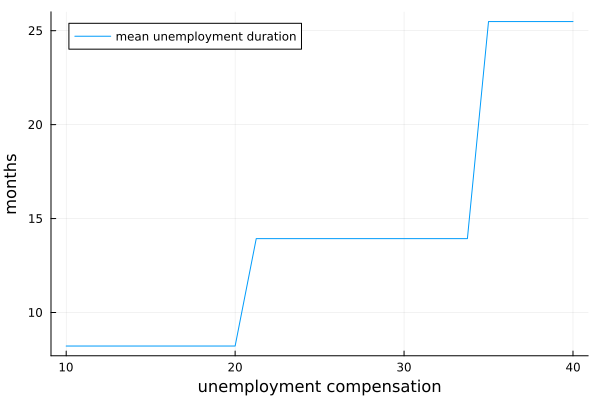

In [16]:
function compute_stopping_time(w̄; seed=1234)
    Random.seed!(seed)
    stopping_time = 0
    t = 1
    # make sure the constraint is sometimes binding
    @assert length(w) - 1 ∈ support(dist) && w̄ <= w[end]
    while true
        # Generate a wage draw
        w_val = w[rand(dist)] # the wage dist set up earlier
        if w_val ≥ w̄
            stopping_time = t
            break
        else
            t += 1
        end
    end
    return stopping_time
end

compute_mean_stopping_time(w̄, num_reps=10000) = mean(i ->
                                                         compute_stopping_time(w̄,
                                                         seed = i), 1:num_reps)
c_vals = range(10,  40, length = 25)
stop_times = similar(c_vals)

beta = 0.99
for (i, c) in enumerate(c_vals)
    w̄ = compute_reservation_wage_ψ(c, beta)
    stop_times[i] = compute_mean_stopping_time(w̄)
end

plot(c_vals, stop_times, label = "mean unemployment duration",
     xlabel = "unemployment compensation", ylabel = "months")

In [17]:
# Just eyeball the plot pending undeprecation and rewrite.
@testset begin
    # @test stop_times[4] ≈ 8.1822
end

Test Summary: |Time
test set      | None  0.0s


Test.DefaultTestSet("test set", Any[], 0, false, false, true, 1.690419194839306e9, 1.690419194849574e9, false)